In [110]:
#Importing
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from pandas import Series
import seaborn as sns
import os
import numpy
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 7]

In [111]:
#Reading in file
data = pd.read_csv('train-set.csv')  #Change the file name to your data
print("dimension of data: {}".format(data.shape))
data.head()

dimension of data: (8523, 12)


,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [112]:
#Preparing file
data.drop('ProductID', axis=1, inplace=True)
data.drop('Weight', axis=1, inplace=True)
data.drop('FatContent', axis=1, inplace=True)
data.drop('ProductVisibility', axis=1, inplace=True)
data.drop('ProductType', axis=1, inplace=True)
data.drop('OutletID', axis=1, inplace=True)
data.drop('EstablishmentYear', axis=1, inplace=True)
data.drop('OutletSize', axis=1, inplace=True)
data.drop('LocationType', axis=1, inplace=True)
data.drop('OutletType', axis=1, inplace=True)
le=LabelEncoder()
#data["Gender"] = le.fit_transform(data["Gender"])   # Change here, delete it or add more rows if necessary
data.head()

,MRP,OutletSales
0,249.8092,3735.1380
1,48.2692,443.4228
2,141.6180,2097.2700
3,182.0950,732.3800
4,53.8614,994.7052


In [113]:
pca = PCA(n_components = 2, random_state = 0) 
pca = pca.fit(data)
df_reduced = pca.transform(data)
df_reduced = pd.DataFrame(df_reduced, columns = ['Dimension 1', 'Dimension 2'])

In [114]:
df_reduced.head()

,Dimension 1,Dimension 2
0,1555.770690,76.586920
1,-1739.414636,-56.683481
2,-83.987906,2.366516
3,-1447.745746,71.124449
4,-1188.134755,-62.518732


/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


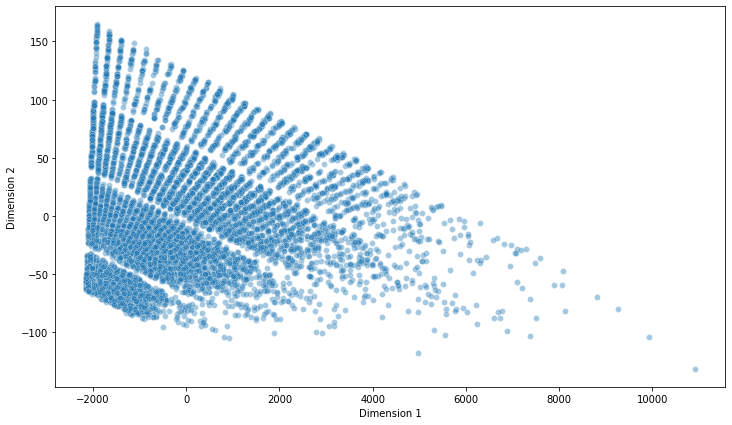

In [115]:
sns.scatterplot(df_reduced['Dimension 1'], df_reduced['Dimension 2'], alpha=0.4)
plt.show()

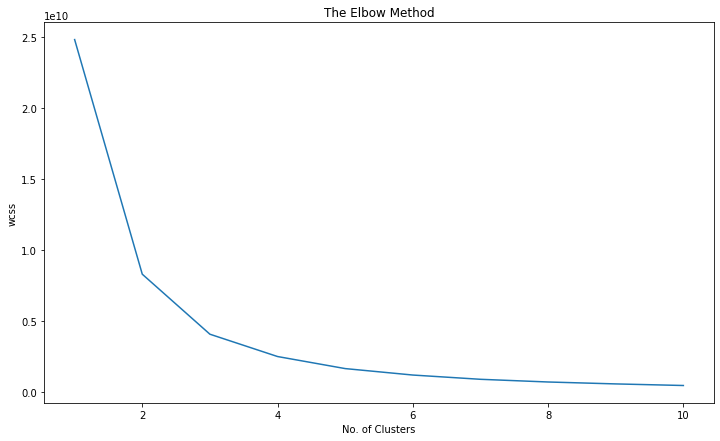

In [116]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    km.fit(df_reduced)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [117]:
for i in range(2, 15):
    km = KMeans(n_clusters = i)
    km.fit(df_reduced)
    label = km.labels_
    sil_coeff = silhouette_score(df_reduced, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(i, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.6151144624559978
For n_clusters=3, The Silhouette Coefficient is 0.581889566651551
For n_clusters=4, The Silhouette Coefficient is 0.5569429632603526
For n_clusters=5, The Silhouette Coefficient is 0.5538777705748387
For n_clusters=6, The Silhouette Coefficient is 0.5495354298290532
For n_clusters=7, The Silhouette Coefficient is 0.5357680316850939
For n_clusters=8, The Silhouette Coefficient is 0.5261406875405453
For n_clusters=9, The Silhouette Coefficient is 0.5272691049302424
For n_clusters=10, The Silhouette Coefficient is 0.5150381670480378
For n_clusters=11, The Silhouette Coefficient is 0.5104446863726155
For n_clusters=12, The Silhouette Coefficient is 0.5065193123401814
For n_clusters=13, The Silhouette Coefficient is 0.5013440282292981
For n_clusters=14, The Silhouette Coefficient is 0.498563117357993


In [118]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df_reduced)
df_pred = pd.concat([df_reduced, pd.DataFrame(clusters, columns=['pred'])], axis=1)

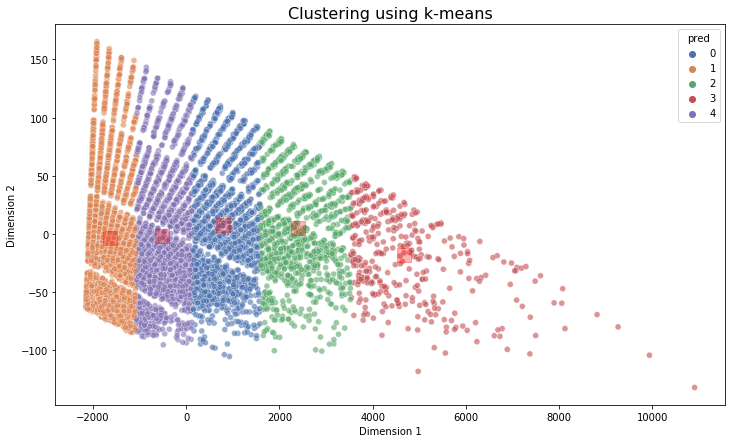

In [119]:
sns.scatterplot(x=df_pred['Dimension 1'], y=df_pred['Dimension 2'],alpha=0.6, hue=df_pred['pred'], palette="deep")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=200 ,marker='s', c='red', alpha=0.3, label='Centroids')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Clustering using k-means', size=16)
plt.show()

In [120]:
###
###Trying Clustering again with normalized data
###

In [121]:
dfNormalized=(df_reduced-df_reduced.mean())/df_reduced.std()

In [122]:
dfNormalized

,Dimension 1,Dimension 2
0,0.911478,1.494046
1,-1.019069,-1.105772
2,-0.049206,0.046166
3,-0.848189,1.387485
4,-0.696091,-1.219606
...,...,...
8518,0.350637,1.192660
8519,-0.956334,0.019455
8520,-0.579495,-0.690125
8521,-0.197089,-0.602669


/Users/ethan/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


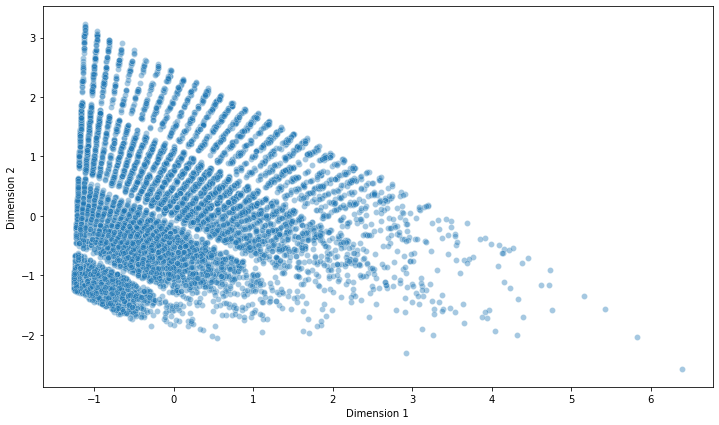

In [123]:
sns.scatterplot(dfNormalized['Dimension 1'], dfNormalized['Dimension 2'], alpha=0.4)
plt.show()

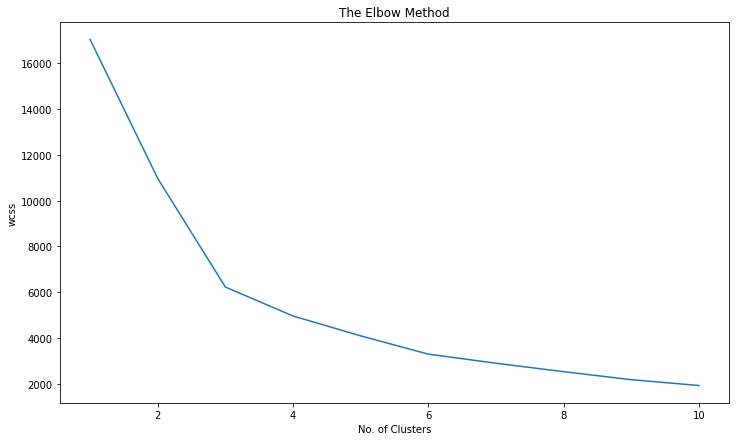

In [124]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    km.fit(dfNormalized)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [125]:
for i in range(2, 15):
    km = KMeans(n_clusters = i)
    km.fit(dfNormalized)
    label = km.labels_
    sil_coeff = silhouette_score(df_reduced, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(i, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.19060235675329787
For n_clusters=3, The Silhouette Coefficient is 0.14834229363819096
For n_clusters=4, The Silhouette Coefficient is 0.0703522203961023
For n_clusters=5, The Silhouette Coefficient is 0.03920202829167472
For n_clusters=6, The Silhouette Coefficient is 0.02558042307174804
For n_clusters=7, The Silhouette Coefficient is 0.02372062885168528
For n_clusters=8, The Silhouette Coefficient is -0.009242446496137823
For n_clusters=9, The Silhouette Coefficient is -0.008774106442063674
For n_clusters=10, The Silhouette Coefficient is -0.02575864217594888
For n_clusters=11, The Silhouette Coefficient is -0.0369912184504504
For n_clusters=12, The Silhouette Coefficient is -0.042622858495400366
For n_clusters=13, The Silhouette Coefficient is -0.04398998506946696
For n_clusters=14, The Silhouette Coefficient is -0.05394174850634668


In [126]:
km = KMeans(n_clusters=6)
clusters = km.fit_predict(dfNormalized)
df_pred = pd.concat([dfNormalized, pd.DataFrame(clusters, columns=['pred'])], axis=1)

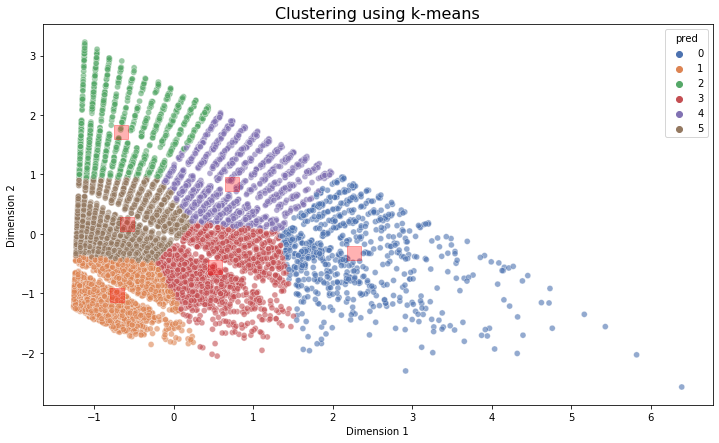

In [127]:
sns.scatterplot(x=df_pred['Dimension 1'], y=df_pred['Dimension 2'],alpha=0.6, hue=df_pred['pred'], palette="deep")
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=200 ,marker='s', c='red', alpha=0.3, label='Centroids')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Clustering using k-means', size=16)
plt.show()